# Project Name - Hotel Booking Analysis  
**Project Type** - Exploratory Data Analysis (EDA) & Data Preprocessing  
**Contribution** - Individual  
**Project By** - Mohamed Hamed  

## Project Summary  
This project analyzes hotel booking data and prepares it for machine learning applications, with a focus on understanding cancellations and reducing revenue loss. The dataset includes information from both city and resort hotels, covering booking details such as lead time, length of stay, number of guests, ADR (average daily rate), and cancellation status.  

The project is divided into three phases:  
1. **Exploratory Data Analysis (EDA)**  
   - Understanding the dataset with summary statistics and visualizations.  
   - Identifying missing values, duplicates, and outliers.  
   - Highlighting key patterns such as cancellation trends by month, hotel type, and lead time.  

2. **Data Cleaning**  
   - Handling missing values (e.g., filling with mode, median, or “None”).  
   - Removing duplicate records.  
   - Treating outliers in features like ADR.  
   - Correcting data types (e.g., converting dates).  

3. **Feature Engineering & Preprocessing**  
   - Creating new features such as `total_guests`, `total_nights`, and `is_family`.  
   - Encoding categorical variables using one-hot encoding or frequency encoding.  
   - Removing data leakage columns (`reservation_status`, `reservation_status_date`).  
   - Splitting the dataset into training and testing sets for future modeling.  

## Conclusion  
By combining EDA with data cleaning and feature engineering, this project produces a clean, structured, and machine-learning-ready dataset. The insights gained such as cancellation patterns by season, market segment, and booking behavior—can help hotels design strategies like discounts for long stays, incentives for direct bookings, and stricter policies for long lead-time reservations. These steps support better revenue management and reduced cancellations.  


## **Problem Statement**  
Last-minute booking cancellations significantly impact hotel profitability. When customers cancel close to their check-in date, it leads to lost revenue and unsold rooms that cannot be resold in time. The hotel revenue team wants to better understand these cancellations and prepare the data for future predictive modeling.  



## **Objective**  
The goal of this project is not to build the final model, but to **transform the raw hotel bookings dataset into a clean, machine-learning-ready dataset**. This will be achieved by:  
- Performing exploratory data analysis (EDA) to identify patterns, missing values, outliers, and data quality issues.  
- Cleaning and preprocessing the data to handle missing values, duplicates, and incorrect data types.  
- Engineering new features and encoding categorical variables.  
- Preventing data leakage by removing columns with post-booking information.  
- Preparing the dataset with a proper train-test split for future modeling.  

By delivering a structured dataset, the project enables the development of predictive models that can help hotels **anticipate and reduce cancellations**, thereby securing revenue and improving operational planning.  


# ***LET'S BEGIN***

##**1.  Know Your Data**




### **Import Libraries**

In [1]:
# Importing necessary libraries needed in EDA
import numpy as np
import pandas as pd
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px        # will be used for plotting

### **Dataset Loading**

In [2]:
#Loading the dataset
hb_df = pd.read_csv('/content/hotel_bookings - hotel_bookings.csv')
hb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
hb_df.shape

(119390, 32)

In [4]:
# Dataset Duplicate Value Count
hb_df.duplicated().sum()

np.int64(31994)

In [5]:
#Dropping the duplicate values
hb_df.drop_duplicates(inplace = True)

In [6]:
null = pd.DataFrame({'Null Values' : hb_df.isna().sum(), 'Percentage Null Values' : (hb_df.isna().sum()) / (hb_df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [7]:
# Based on the given dataset description, list the columns that are categorical in terms of their semantics
categorical_columns_semantics = [
    'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
    'name',
    'email',
    'phone-number',
    'credit_card'
]

# Convert these columns to string (object) data type
for column in categorical_columns_semantics:
    if column in hb_df.columns:
        hb_df[column] = hb_df[column].astype(str)

# Verify the changes in data types
hb_df.dtypes

,0
hotel,object
is_canceled,object
lead_time,int64
arrival_date_year,object
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


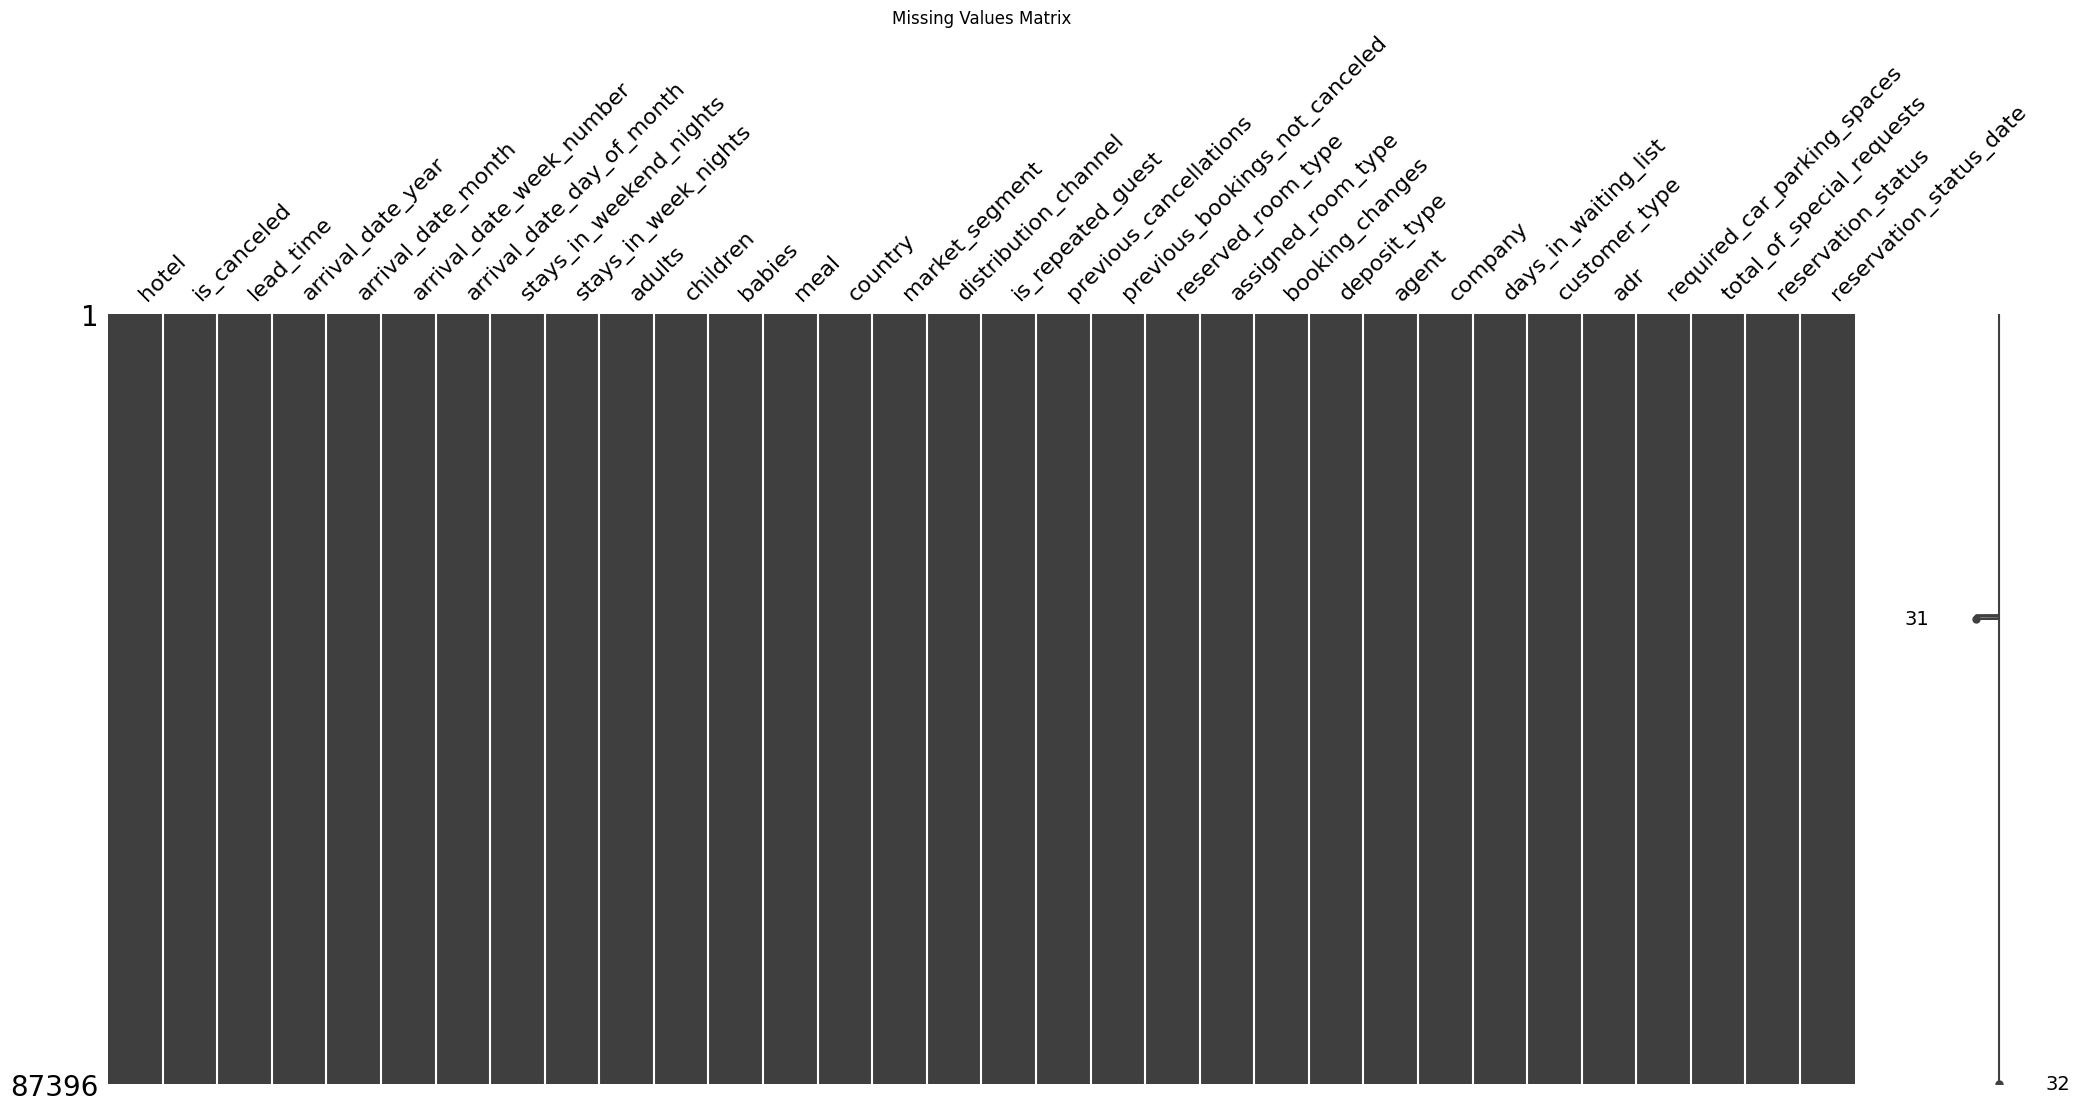

In [8]:
import missingno as msno

msno.matrix(hb_df)
plt.title('Missing Values Matrix')
plt.show()

Missing Values:

1.   The column children has 4 missing values.
2.   The column country has 452 missing values.
2.   The column agent has 12193	 missing values.
4.   The column company has a significant number of missing values, totaling 112,593. 93%

In [9]:
# Dataset Describe
hb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0
previous_cancellations,87396.0,0.030413,0.369145,0.00,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,87396.0,0.183990,1.731894,0.00,0.0,0.0,0.0,72.0



## Understanding Numerical Variables

1. **lead\_time**

   * Mean = 79 days; Range: 0 – 737
   * Some bookings are made **2 years in advance**, which might be unusual and worth investigating.

2. **arrival\_date\_week\_number**

   * Mean = 26.8; Range: 1 – 53
   * Covers the full calendar year.

3. **arrival\_date\_day\_of\_month**

   * Mean = 15.8; Range: 1 – 31
   * No obvious issues; looks consistent with calendar days.

4. **stays\_in\_weekend\_nights**

   * Mean = 1 night; Range: 0 – 19
   * Values above 10 could be long stays or errors.

5. **stays\_in\_week\_nights**

   * Mean = 2.6 nights; Range: 0 – 50
   * Bookings of **40+ weekdays** are highly unusual and may be outliers.

6. **adults**

   * Mean = 2; Range: 0 – 55
   * Values greater than 10 adults in one booking are suspicious; likely data entry issues.

7. **children**

   * Mean = 0.1; Range: 0 – 10
   * Extreme values (8–10 children) might be outliers.

8. **babies**

   * Mean = 0.01; Range: 0 – 10
   * High values (5 or more babies) are likely unrealistic.

9. **previous\_cancellations**

   * Mean = 0.03; Range: 0 – 26
   * Guests with 10 or more prior cancellations may be **edge cases** or misrecorded.

10. **previous\_bookings\_not\_canceled**

    * Mean = 0.18; Range: 0 – 72
    * Unusually high numbers (30 or more) might be noise.

11. **booking\_changes**

    * Mean = 0.27; Range: 0 – 21
    * Frequent changes (more than 10) could indicate **problematic customers** or errors.

12. **days\_in\_waiting\_list**

    * Mean = 0.7; Range: 0 – 391
    * 391 days (over 1 year) waitlist is **not realistic** and likely an outlier.

13. **adr**

    * Mean = 106.33; Range: -6.38 – 5400
    * Negative ADR = invalid.
    * ADR greater than 1000 also suspicious = likely outliers.

14. **required\_car\_parking\_spaces**

    * Mean = 0.08; Range: 0 – 8
    * Values greater than 3 are rare and could be noise.

15. **total\_of\_special\_requests**

    * Mean = 0.69; Range: 0 – 5
    * Distribution looks normal; no red flags.


---
# **Noisy Features**
1. adr (Average Daily Rate)

   * Min = -6.38  a negative room rate doesn’t make business sense. Likely a data entry issue, refund adjustment, or special case. Needs cleaning or capping at 0.

2. adults

    * Min = 0  a booking with 0 adults is unrealistic (children can’t check in alone). Could be data entry error or should be re-coded.

3. children and babies

   * Both have a max of 10 per booking, which is unusually high. While possible in large groups, these are likely outliers.

# Now Checking for Categorical Variables

In [10]:
hb_df.describe(include='object').T

,count,unique,top,freq
hotel,87396,2,City Hotel,53428
is_canceled,87396,2,0,63371
arrival_date_year,87396,3,2016,42391
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
country,87396,178,PRT,27453
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
is_repeated_guest,87396,2,0,83981
reserved_room_type,87396,10,A,56552



### **Categorical Feature Summary (Hotel Booking Dataset)**

1. **hotel**

   * Unique values: 2 (City Hotel, Resort Hotel)
   * Most frequent: *City Hotel* (53,428 / 87,396 = 61%)

2. **is\_canceled**

   * Unique values: 2 (0 = not canceled, 1 = canceled)
   * Most frequent: *0 (Not canceled)* (63,371 / 87,396 = 72%)

3. **arrival\_date\_year**

   * Unique values: 3 (2015, 2016, 2017)
   * Most frequent: *2016* (42,391)

4. **arrival\_date\_month**

   * Unique values: 12 (Jan–Dec)
   * Most frequent: *August* (11,257)

5. **meal**

   * Unique values: 5
   * Most frequent: *BB (Bed & Breakfast)* (67,978)

6. **country**

   * Unique values: 178
   * Most frequent: *PRT (Portugal)* (27,453)

7. **market\_segment**

   * Unique values: 8
   * Most frequent: *Online TA* (51,618)

8. **distribution\_channel**

   * Unique values: 5
   * Most frequent: *TA/TO* (69,141)

9. **is\_repeated\_guest**

   * Unique values: 2
   * Most frequent: *0 (Not repeated)* (83,981 / 87,396 = 96%)

10. **reserved\_room\_type**

    * Unique values: 10
    * Most frequent: *A* (56,552)

11. **assigned\_room\_type**

    * Unique values: 12
    * Most frequent: *A* (46,313)

12. **deposit\_type**

    * Unique values: 3
    * Most frequent: *No Deposit* (86,251 / 87,396 = 99%)

13. **agent**

    * Unique values: 334
    * Most frequent: *Agent ID 9* (28,759)

14. **company**

    * Unique values: 353 (but many missing)
    * Most frequent: *NaN* (82,137 / 87,396 = 94%)

15. **customer\_type**

    * Unique values: 4
    * Most frequent: *Transient* (71,986)

16. **reservation\_status**

    * Unique values: 3
    * Most frequent: *Check-Out* (63,371)

17. **reservation\_status\_date**

    * Unique values: 926
    * Most frequent: *2016-02-14* (211 times)

---

### **Notable Data Quality Observations**

* **High missing values**:

  * company (93% missing)
  * agent sparse with many IDs rarely used

* **Class imbalance**:

  * deposit_type is overwhelmingly *No Deposit*
  * is_repeated_guest mostly *0* → very few repeated guests

* **Country distribution**:

  * Skewed heavily toward Portugal (PRT dominates bookings)

* **Reservation patterns**:

  * reservation_status is mostly *Check-Out*, but cancellations remain significant (28%)

---
# **Now For EDA Starting With Univariant Analysis**


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


## **Q1:What is the distribution of lead_time?**
 * Most bookings are made within 0–200 days, but there are outliers where guests booked almost 2 years in advance.

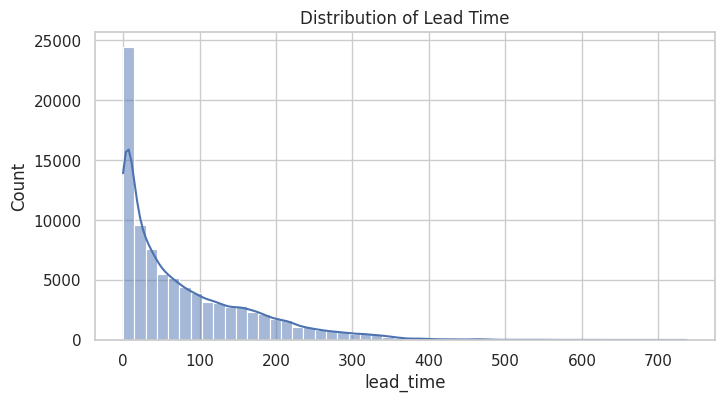

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(hb_df['lead_time'], bins=50, kde=True)
plt.title("Distribution of Lead Time")
plt.show()

# **Q2: Which months have the most bookings?**
* Peak season appears around August.

* Off-peak months like January–March have fewer bookings.

/tmp/ipython-input-2603281971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hb_df, x='arrival_date_month', order=[


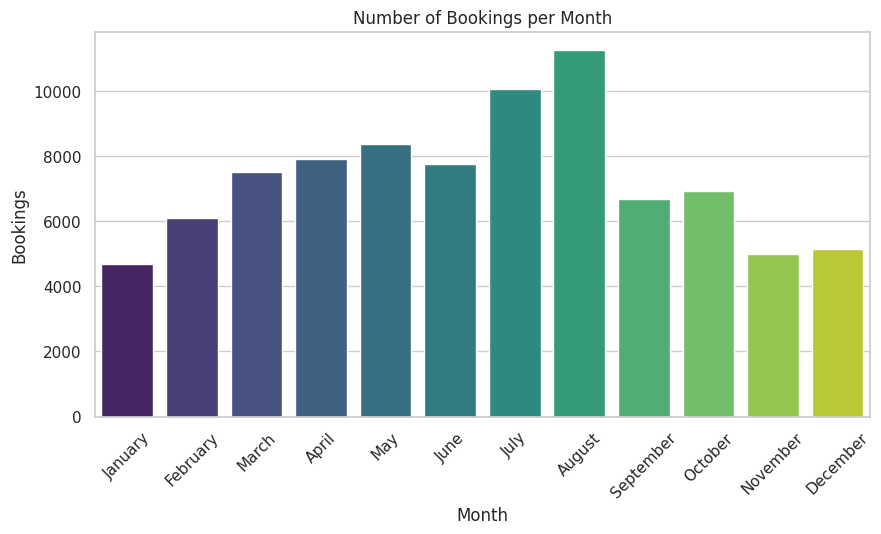

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=hb_df, x='arrival_date_month', order=[
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"],
    palette="viridis")
plt.title("Number of Bookings per Month")
plt.xlabel("Month")
plt.ylabel("Bookings")
plt.xticks(rotation=45)
plt.show()


## **Q3: What percentage of bookings are canceled?**

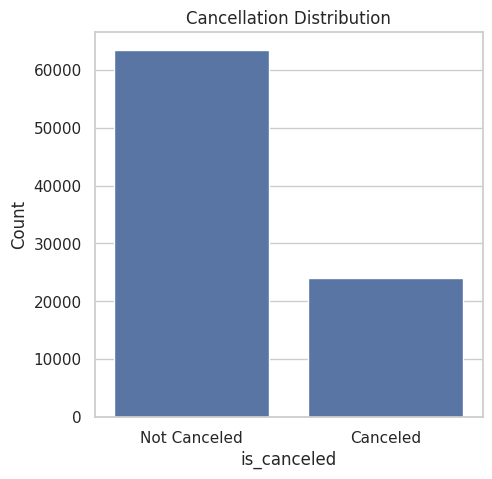

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data=hb_df, x='is_canceled')
plt.title("Cancellation Distribution")
plt.xticks([0,1], ["Not Canceled","Canceled"])
plt.ylabel("Count")
plt.show()

## **Q4: Which countries contribute the most guests?**

* Portugal (PRT) dominates, followed by a few European countries.


/tmp/ipython-input-1042058516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="mako")


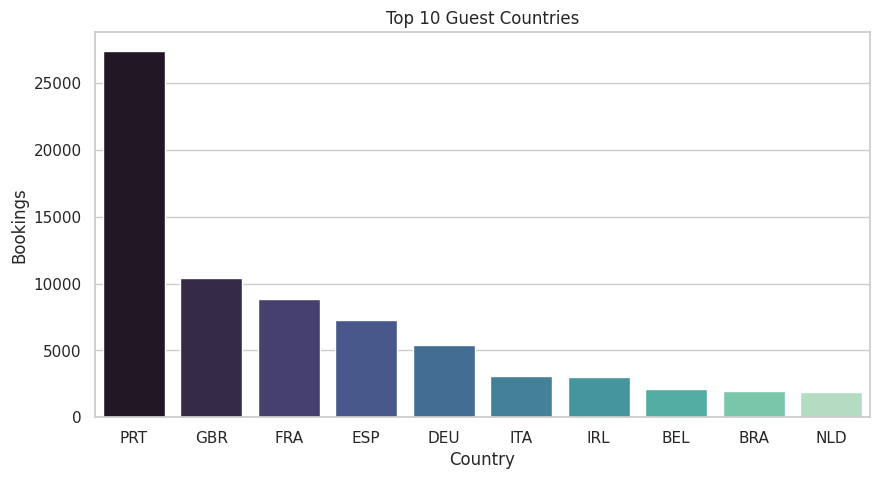

In [15]:
top_countries = hb_df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="mako")
plt.title("Top 10 Guest Countries")
plt.xlabel("Country")
plt.ylabel("Bookings")
plt.show()

## **Q5: What is the distribution of total stay length?**
* Most stays are between 1–7 nights, but some extreme outliers over 20+

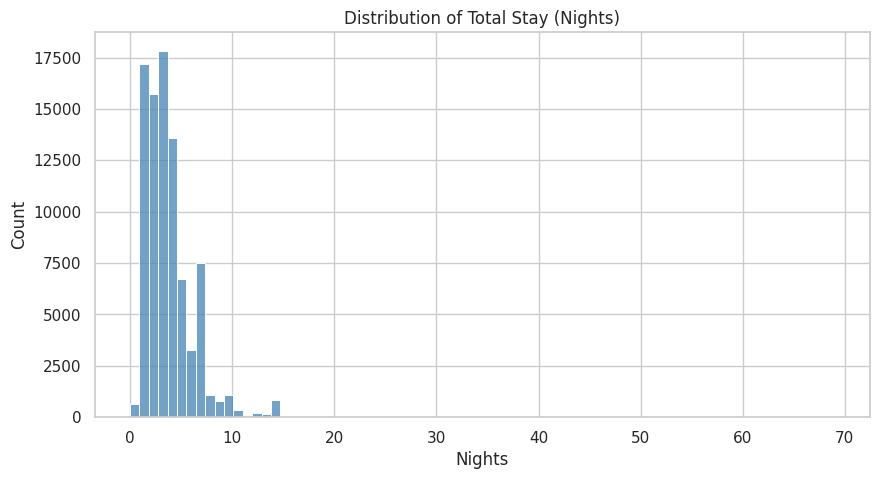

In [16]:
hb_df['total_stay'] = hb_df['stays_in_weekend_nights'] + hb_df['stays_in_week_nights']

plt.figure(figsize=(10,5))
sns.histplot(hb_df['total_stay'], bins=75, kde=False, color="steelblue")
plt.title("Distribution of Total Stay (Nights)")
plt.xlabel("Nights")
plt.ylabel("Count")
plt.show()


## **Q5: What’s the distribution of ADR (price per night) ?**
* ADR clusters around 50–150. Outliers above 1000 are likely errors.

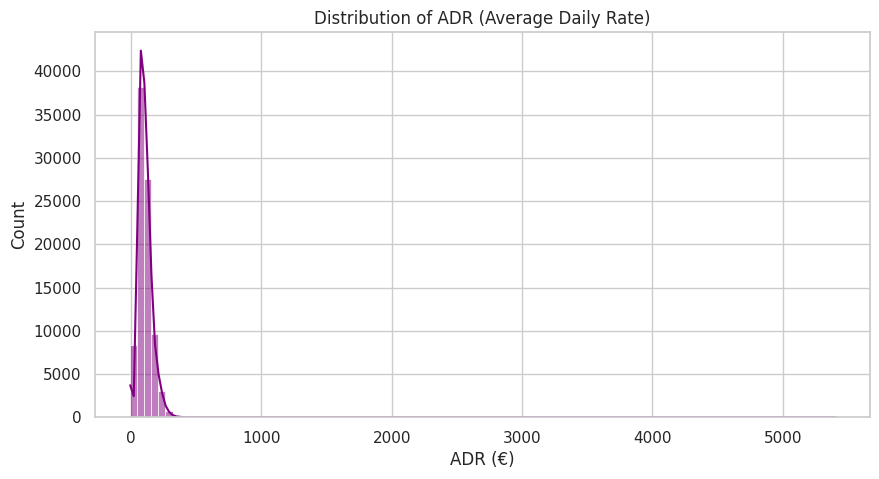

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(hb_df['adr'], bins=100, kde=True, color="purple")
# plt.xlim(0, 500)  # limit for readability
plt.title("Distribution of ADR (Average Daily Rate)")
plt.xlabel("ADR (€)")
plt.show()


---
# **Bivariate Analysis**

## **Q1: How does cancellation rate vary by hotel type?**
* City Hotels tend to have slightly higher cancellations than Resort Hotels.(very important tho)

/tmp/ipython-input-1278536685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hb_df, x="hotel", y="is_canceled", palette="Set1")


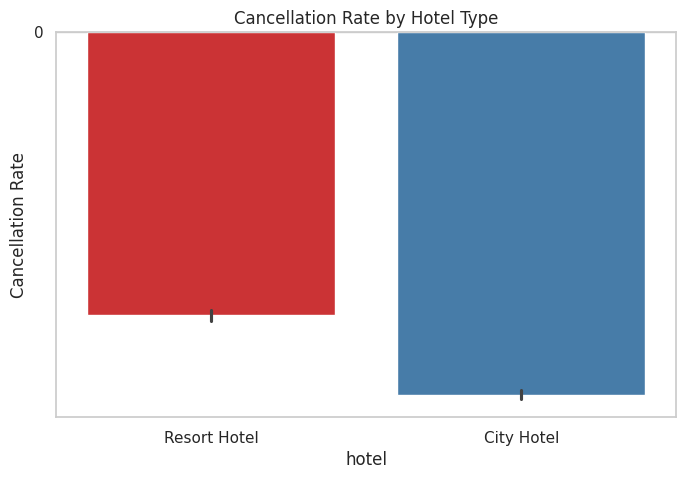

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=hb_df, x="hotel", y="is_canceled", palette="Set1")
plt.title("Cancellation Rate by Hotel Type")
plt.ylabel("Cancellation Rate")
plt.show()


## **Q2: Do lead times differ between canceled and not canceled bookings?**
* Canceled bookings usually have much longer lead times.

/tmp/ipython-input-1654524394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hb_df, x="is_canceled", y="lead_time", palette="coolwarm")


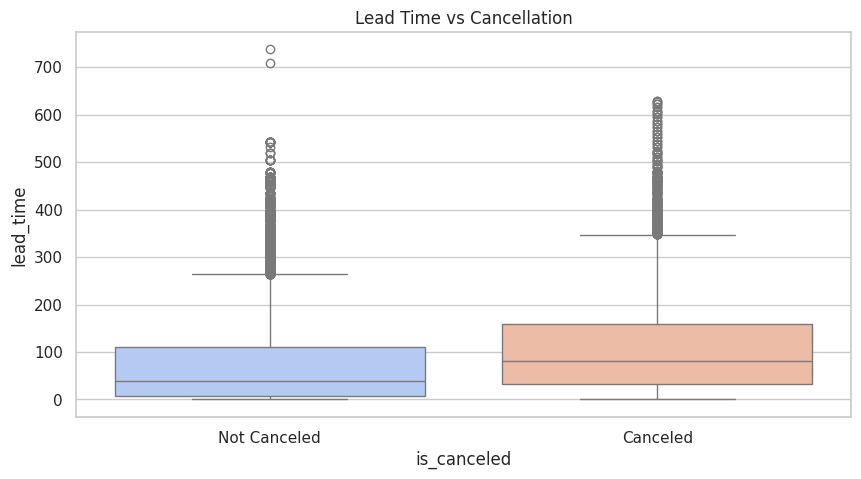

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=hb_df, x="is_canceled", y="lead_time", palette="coolwarm")
plt.title("Lead Time vs Cancellation")
plt.xticks([0,1], ["Not Canceled","Canceled"])
plt.show()


## **Q3: Does deposit type influence cancellations?**

* Non-Refundable deposits are rarely canceled. while no deposit is the most refundable wise

/tmp/ipython-input-2347663701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hb_df, x="deposit_type", y="is_canceled", palette="pastel")


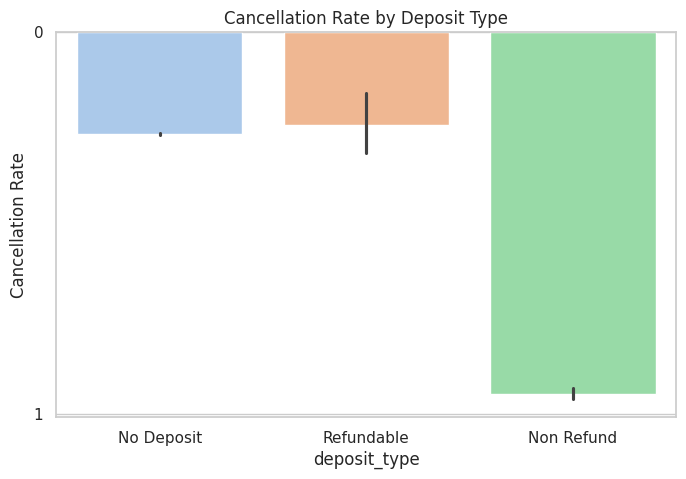

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=hb_df, x="deposit_type", y="is_canceled", palette="pastel")
plt.title("Cancellation Rate by Deposit Type")
plt.ylabel("Cancellation Rate")
plt.show()

## **Q4: Do repeated guests cancel less often?**

* Repeated guests cancel much less often compared to new guests.

/tmp/ipython-input-4038946059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hb_df, x="is_repeated_guest", y="is_canceled", palette="husl")


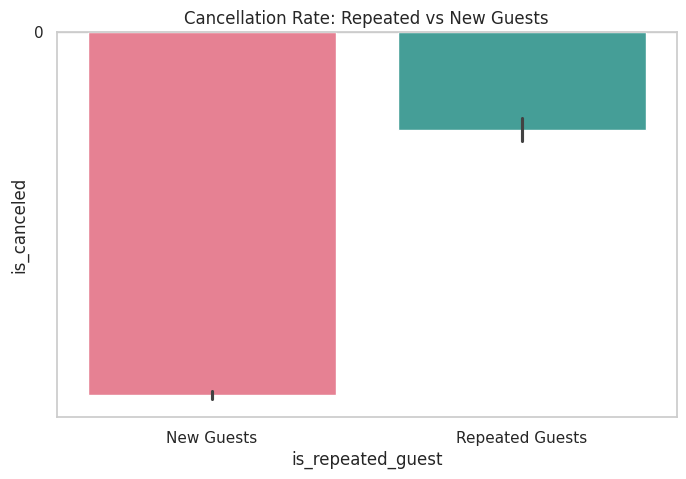

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(data=hb_df, x="is_repeated_guest", y="is_canceled", palette="husl")
plt.title("Cancellation Rate: Repeated vs New Guests")
plt.xticks([0,1], ["New Guests","Repeated Guests"])
plt.show()

## **Q5. Do longer stays cancel more?**
 * Insights: Cancellation rate peaks around short stays (1–3 nights).

/tmp/ipython-input-1188090479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hb_df, x="total_stay", y="is_canceled", palette="Set2")


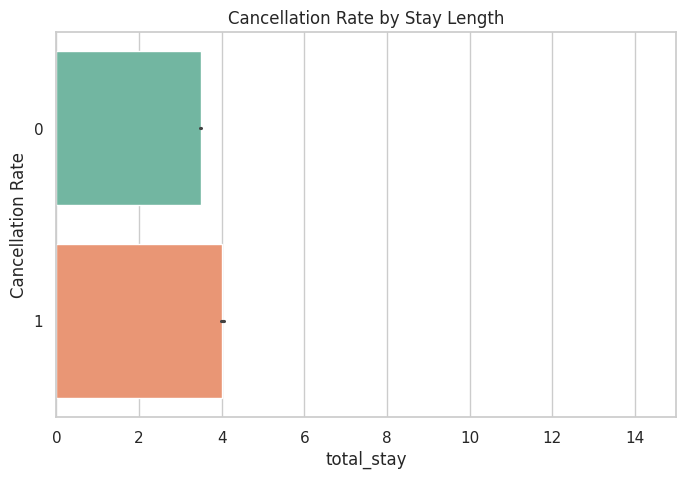

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=hb_df, x="total_stay", y="is_canceled", palette="Set2")
plt.title("Cancellation Rate by Stay Length")
plt.ylabel("Cancellation Rate")
plt.xlim(0,15)  # focus on normal stays
plt.show()

## **Q6: Does ADR differ between canceled vs not canceled?**
 * Canceled bookings often show slightly higher ADR.

/tmp/ipython-input-2327456577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hb_df, x="is_canceled", y="adr", palette="husl")


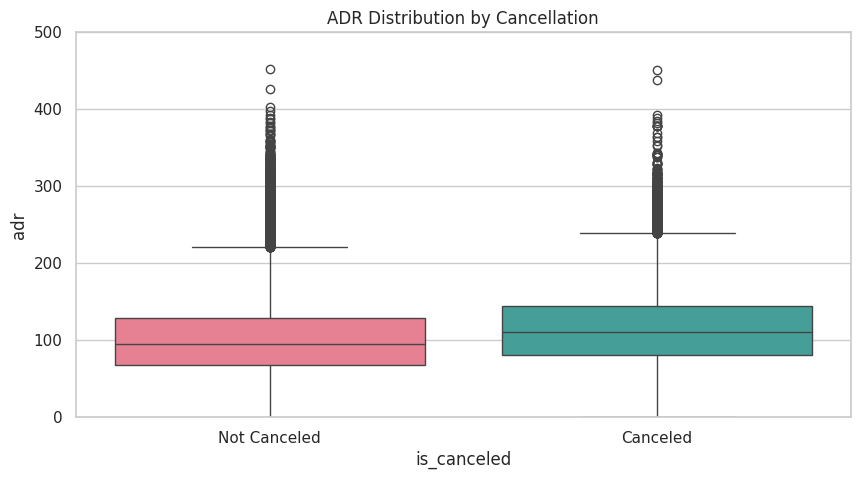

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=hb_df, x="is_canceled", y="adr", palette="husl")
plt.ylim(0,500)
plt.title("ADR Distribution by Cancellation")
plt.xticks([0,1], ["Not Canceled","Canceled"])
plt.show()

## **Q7: Do special requests reduce cancellations?**

/tmp/ipython-input-112595411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hb_df, x="total_of_special_requests", y="is_canceled", palette="Blues")


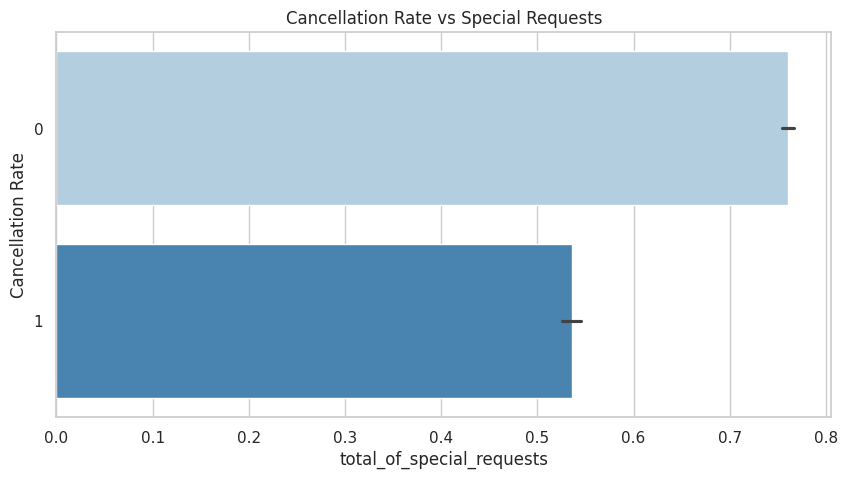

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=hb_df, x="total_of_special_requests", y="is_canceled", palette="Blues")
plt.title("Cancellation Rate vs Special Requests")
plt.ylabel("Cancellation Rate")
plt.show()


---

# **Multivariate Analysis**

## **Q1: How do lead time, deposit type, and cancellation interact?**
* Long lead times and No Deposit = high cancellation probability.

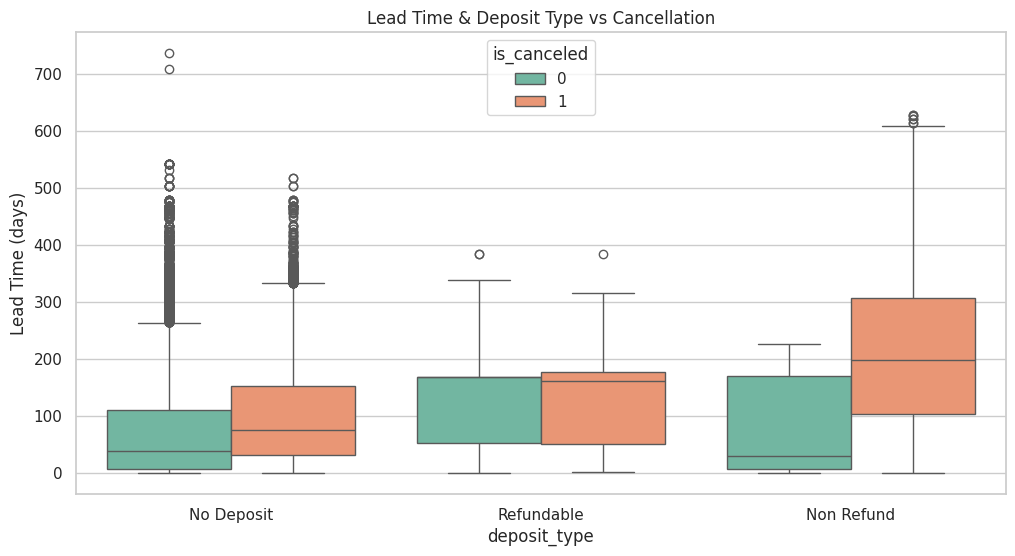

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=hb_df, x="deposit_type", y="lead_time", hue="is_canceled", palette="Set2")
plt.title("Lead Time & Deposit Type vs Cancellation")
plt.ylabel("Lead Time (days)")
plt.show()

## **Q2: How do lead time, hotel type, and cancellations interact?**
* Long lead times strongly linked to cancellations, especially in city hotels.

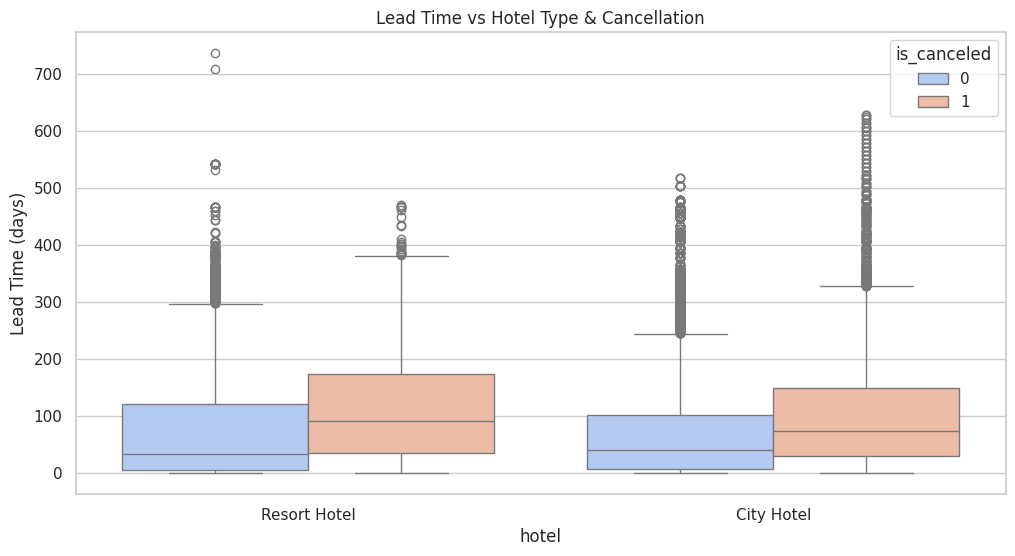

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=hb_df, x="hotel", y="lead_time", hue="is_canceled", palette="coolwarm")
plt.title("Lead Time vs Hotel Type & Cancellation")
plt.ylabel("Lead Time (days)")
plt.show()

## **Q3: Cancellation heatmap by month & hotel type**
* Summer months (June–August) show peak cancellations, mostly in city hotels.


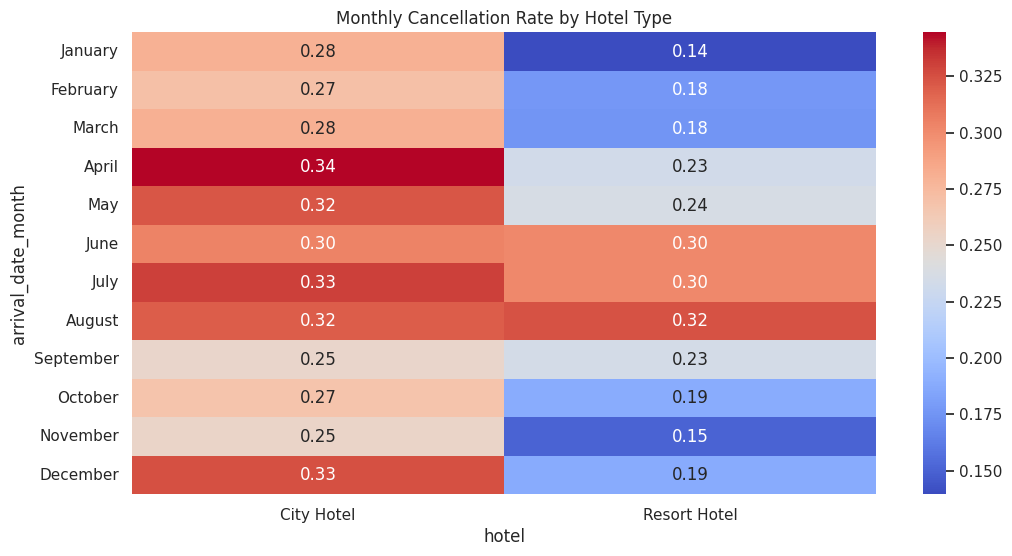

In [29]:
# Convert 'is_canceled' to numeric before aggregation
hb_df['is_canceled'] = hb_df['is_canceled'].astype(int)

plt.figure(figsize=(12,6))
sns.heatmap(hb_df.groupby(['arrival_date_month','hotel'])['is_canceled']
            .mean().unstack().reindex([
                "January","February","March","April","May","June",
                "July","August","September","October","November","December"]),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Monthly Cancellation Rate by Hotel Type")
plt.show()

## **Detect outliers**

In [30]:
num_cols = ['lead_time','stays_in_weekend_nights','stays_in_week_nights',
            'adults','children','babies','adr','total_of_special_requests']

outlier_summary = {}

for col in num_cols:
    Q1 = hb_df[col].quantile(0.25)
    Q3 = hb_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = hb_df[(hb_df[col] < lower_bound) | (hb_df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

import pandas as pd
pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])


,Outlier Count
lead_time,2396
stays_in_weekend_nights,220
stays_in_week_nights,1531
adults,22899
children,8364
babies,914
adr,2490
total_of_special_requests,2673


## **Finally Correlation heatmap (numerical features)**

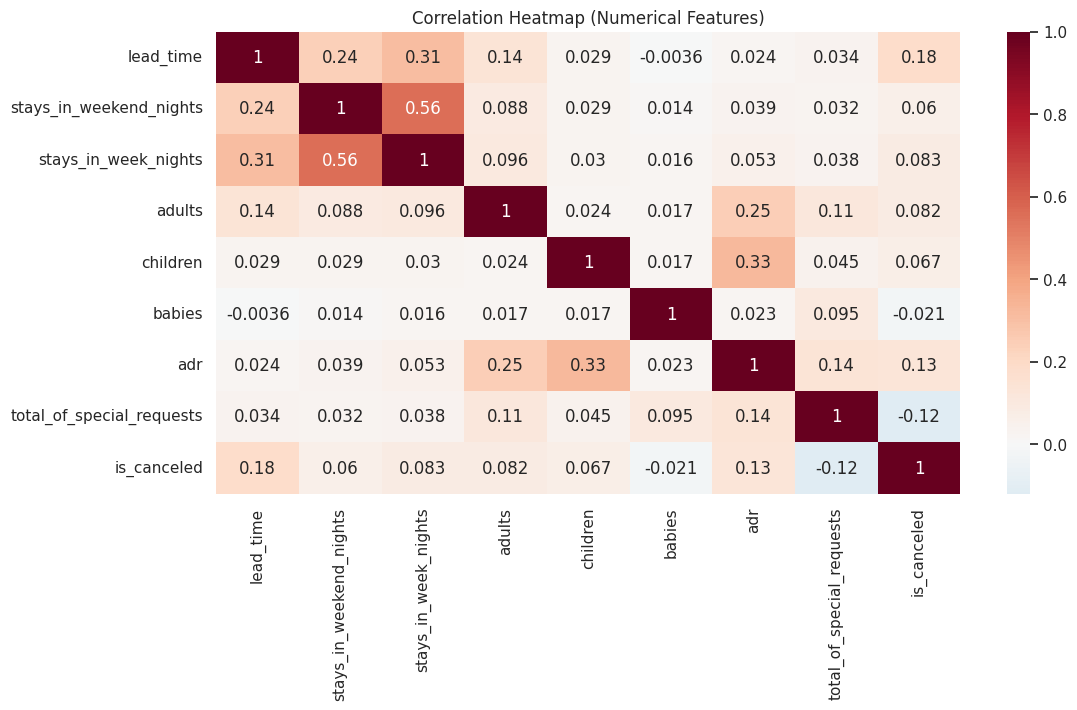

In [31]:
plt.figure(figsize=(12,6))
corr = hb_df[['lead_time','stays_in_weekend_nights','stays_in_week_nights',
              'adults','children','babies','adr','total_of_special_requests',
              'is_canceled']].corr()

sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


# **Log Transform Skewed Features**
* After log transformation, distributions become more symmetric → better for ML models like Logistic Regression

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


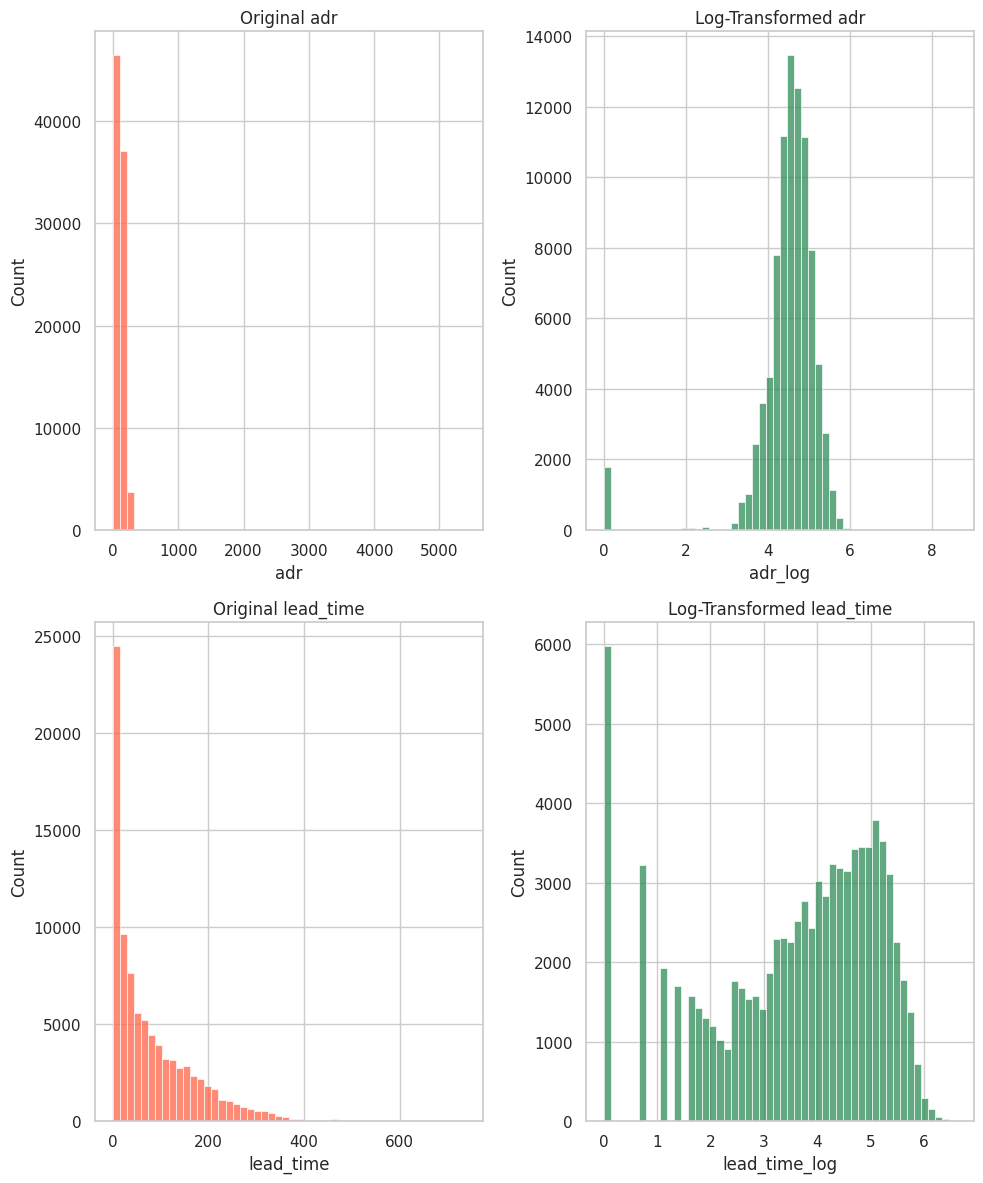

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Features to log-transform (because of skewness/outliers)
skewed_features = [
    "adr",
    "lead_time",
]

# Apply log1p (log(1+x) to handle 0 values safely)
for col in skewed_features:
    hb_df[col + "_log"] = np.log1p(hb_df[col])

# Before vs After distribution check
fig, axes = plt.subplots(len(skewed_features), 2, figsize=(10, 12))
for i, col in enumerate(skewed_features):
    sns.histplot(hb_df[col], bins=50, ax=axes[i, 0], color="tomato")
    axes[i, 0].set_title(f"Original {col}")

    sns.histplot(hb_df[col + "_log"], bins=50, ax=axes[i, 1], color="seagreen")
    axes[i, 1].set_title(f"Log-Transformed {col}")

plt.tight_layout()
plt.show()


## **PCA (Principal Component Analysis)**

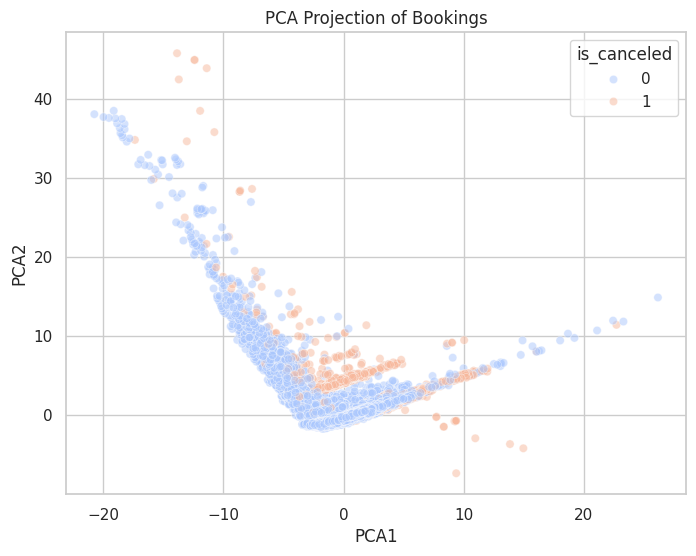

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select only numeric features
num_features = hb_df.select_dtypes(include=['int64','float64']).dropna(axis=1)

# Scale numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_features)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to dataframe
hb_df["PCA1"] = pca_result[:,0]
hb_df["PCA2"] = pca_result[:,1]

# Scatter plot with cancellation status
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="is_canceled", data=hb_df, palette="coolwarm", alpha=0.5)
plt.title("PCA Projection of Bookings")
plt.show()



# **Phase 2: Data Cleaning**
    - Handle missing values
    - Remove nonsensical rows (e.g., adults = 0)
    - Cap extreme outliers
    - Fix data types
   


Drop nonsensical rows

Bookings with adults=0 (and children=0, babies=0) → no guests → unrealistic.

Handle Missing Values

company → "None" (means no company booking).

agent → "None" (means no booking agent).

country → fill with mode (most frequent country).

children → fill with 0 (majority of bookings have no children).

Outlier Handling

Negative adr removed.

Cap extreme values:

adr > 1000 → 1000

stays_in_week_nights > 30 → 30

stays_in_weekend_nights > 10 → 10

babies > 5 → 5

children > 8 → 8

adults > 10 → 10

days_in_waiting_list > 365 → 365

Remove Duplicates

Ensures no duplicate booking records.

Fix Data Types

Convert reservation_status_date to datetime for consistency.

 Why?

This ensures the dataset is realistic, consistent, and free from extreme distortions. Without it, the model could learn from noise (e.g., negative ADR, 55 adults in one booking, or duplicate rows).

In [35]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class Phase2Cleaner(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.country_mode = None

    def fit(self, X, y=None):
        # Store most common country for imputation
        self.country_mode = X['country'].mode()[0]
        return self

    def transform(self, X):
        X = X.copy()

        # 1. Drop rows with no guests
        X = X[~((X['adults'] == 0) & (X['children'] == 0) & (X['babies'] == 0))]

        # 2. Missing values
        X['company'] = X['company'].fillna("None")
        X['agent'] = X['agent'].fillna("None")
        X['country'] = X['country'].fillna(self.country_mode)
        X['children'] = X['children'].fillna(0)

        # 3. Handle outliers
        X = X[X['adr'] >= 0]                        # remove negative ADR
        X['adr'] = X['adr'].clip(upper=1000)
        X['stays_in_week_nights'] = X['stays_in_week_nights'].clip(upper=30)
        X['stays_in_weekend_nights'] = X['stays_in_weekend_nights'].clip(upper=10)
        X['babies'] = X['babies'].clip(upper=5)
        X['children'] = X['children'].clip(upper=8)
        X['adults'] = X['adults'].clip(upper=10)
        X['days_in_waiting_list'] = X['days_in_waiting_list'].clip(upper=365)

        # 4. Remove duplicates
        X = X.drop_duplicates()

        # 5. Fix data types
        if 'reservation_status_date' in X.columns:
            X['reservation_status_date'] = pd.to_datetime(X['reservation_status_date'])

        # 6. Drop high-cardinality / identifier columns
        to_drop = ["name", "email", "phone-number", "credit_card", "company", "agent"]
        X = X.drop(columns=[c for c in to_drop if c in X.columns], errors="ignore")

        return X


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Function to build preprocessor dynamically
def preprocessor(X):
    # Select numeric & categorical columns automatically after Phase 2+3
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
    categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

    # Build transformers
    numeric_transformer = StandardScaler()   # optional for RandomForest (not needed, but useful if you test LR, SVM, etc.)
    categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

    # ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

    return preprocessor



# **Phase 3: Feature Engineering & Preprocessing**
    - Create new features
    - Drop leakage features





###  What We Do

1. **Create New Features**

   * total_guests = adults + children + babies into captures group size.
   * total_nights = stays_in_weekend_nights + stays_in_week_nights into captures total length of stay.
   * is_family = 1 if (children + babies > 0) else 0` into family vs. non-family.
2. **Remove Data Leakage**

   * Drop reservation_status and reservation_status_date (only known *after* booking, not before).
3. **Encoding & Scaling**

   * Numerical variables → impute with median + scale with StandardScaler.
   * Categorical variables → impute with most frequent + OneHotEncode (drop “unknowns” into “Other” if needed).

###  Why?

This makes the dataset **model-ready** by:

* Adding **domain-relevant insights** (group size, family flag, stay duration).
* Preventing **future info leakage** that would artificially inflate accuracy.
* Ensuring ML models can handle both **numbers and categories** properly.

In [36]:
class Phase3Engineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Create proper datetime from year, month, and day
        month_map = {month: i+1 for i, month in enumerate([
            "January","February","March","April","May","June",
            "July","August","September","October","November","December"
        ])}

        df["arrival_month_num"] = df["arrival_date_month"].map(month_map)
        df["arrival_date"] = pd.to_datetime(
            df["arrival_date_year"].astype(str) + "-" +
            df["arrival_month_num"].astype(str) + "-" +
            df["arrival_date_day_of_month"].astype(str),
            errors="coerce"
        )

        # Core engineered features
        df["total_guests"] = df["adults"] + df["children"] + df["babies"]
        df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
        df["is_family"] = ((df["children"] + df["babies"]) > 0).astype(int)

        # Drop redundant originals
        df.drop(columns=[
            "adults", "children", "babies",
            "stays_in_weekend_nights", "stays_in_week_nights",
            "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month",
            "arrival_month_num",  # helper
            "reservation_status", "reservation_status_date"
        ], inplace=True, errors="ignore")

        return df


In [46]:
from sklearn.pipeline import Pipeline

# Combine both phases into one pipeline
pipeline = Pipeline(steps=[
    ("phase2_cleaning", Phase2Cleaner()),
    ("phase3_engineering", Phase3Engineer()),
    ("preprocessing", preprocessor)
])

# Example usage:
# Separate target
X = hb_df.drop(columns=['is_canceled'])
y = hb_df['is_canceled']

In [54]:
from sklearn.pipeline import Pipeline
import pandas as pd

# Separate target
X = hb_df.drop(columns=['is_canceled'])
y = hb_df['is_canceled']

# Apply the cleaning and engineering steps first
cleaner = Phase2Cleaner()
engineer = Phase3Engineer()

X_intermediate = cleaner.fit_transform(X)
y_cleaned = y.loc[X_intermediate.index] # Align y with cleaned X
X_engineered = engineer.fit_transform(X_intermediate)

# Now, define the preprocessor using the engineered data to ensure correct columns are selected
preprocessor_obj = preprocessor(X_engineered)

# Create a pipeline with only the preprocessing step
preprocessing_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor_obj)
])

# Fit and transform the engineered data using the preprocessing pipeline
X_processed = preprocessing_pipeline.fit_transform(X_engineered, y_cleaned)


print("✅ Cleaned and preprocessed data generated and stored in X_processed.")

✅ Cleaned and preprocessed data generated and stored in X_processed.


# **Optional Modeling (Logistic Regression)**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas
from sklearn.pipeline import Pipeline # Import Pipeline

# Separate target
X = hb_df.drop(columns=['is_canceled'])
y = hb_df['is_canceled']

# Apply the Phase2Cleaner to both X and y to ensure consistent samples
cleaner = Phase2Cleaner()
# Fit the cleaner on X and transform both X and y
X_cleaned = cleaner.fit_transform(X)
# Align y with the cleaned X by using the index
y_cleaned = y.loc[X_cleaned.index]

# Apply the Phase3Engineer
engineer = Phase3Engineer()
X_engineered = engineer.fit_transform(X_cleaned)

# Now, define the preprocessor using the engineered data to ensure correct columns are selected
preprocessor_obj = preprocessor(X_engineered)

# Fit and transform the engineered data using the preprocessor object directly
X_processed = preprocessor_obj.fit_transform(X_engineered, y_cleaned)


# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42) # Using liblinear for potentially large datasets
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9553


In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming y_test, y_pred, model, X_train, and y_train are available from the previous cells' execution

# Calculate training accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Logistic Regression Training Accuracy: {train_accuracy:.4f}")

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Test Accuracy: {test_accuracy:.4f}")

# Calculate Test F1 score
test_f1 = f1_score(y_test, y_pred)
print(f"Logistic Regression Test F1 Score: {test_f1:.4f}")

# Calculate Test precision
test_precision = precision_score(y_test, y_pred)
print(f"Logistic Regression Test Precision: {test_precision:.4f}")

# Calculate Test recall
test_recall = recall_score(y_test, y_pred)
print(f"Logistic Regression Test Recall: {test_recall:.4f}")

Logistic Regression Training Accuracy: 0.9545
Logistic Regression Test Accuracy: 0.9553
Logistic Regression Test F1 Score: 0.9179
Logistic Regression Test Precision: 0.9297
Logistic Regression Test Recall: 0.9063


Number of features in the processed data: 247


In [63]:
# Assuming X_engineered is available from previous steps

# Save the cleaned and engineered data to a CSV file
output_csv_path = "hotel_bookings_cleaned_engineered.csv"
X_engineered.to_csv(output_csv_path, index=False)

print(f"✅ Cleaned and engineered data saved to {output_csv_path}")

✅ Cleaned and engineered data saved to hotel_bookings_cleaned_engineered.csv
